In [1]:
#from coffea import hist, processor 
#from coffea.hist import plot
import hist
from coffea.util import load, save
import mplhep as hep
import matplotlib.pyplot as plt
import copy
import numpy as np
import os
from tabulate import tabulate
import uncertainties as unc  
import uncertainties.unumpy as unumpy 
plt.style.use(hep.style.CMS)

year = '2018'

hists = load('../hists/btageff'+year+'.merged')

In [10]:
for k in hists['deepflav']:
    try:
        btag += hists['deepflav'][k]
    except:
        btag = hists['deepflav'][k]
bpass = btag[{"wp": "loose", "btag": "pass"}].view()
ball = btag[{"wp": "loose", "btag": sum}].view()

upass = bpass
uall = ball

In [11]:
lfpass = unumpy.uarray(( bpass[0], np.sqrt(upass[0]) ))
lfall = unumpy.uarray(( ball[0], np.sqrt(uall[0]) ))
lfall[lfall<=0.]=1.
lf = lfpass / lfall

cspass = unumpy.uarray(( bpass[1], np.sqrt(upass[1]) ))
csall = unumpy.uarray(( ball[1], np.sqrt(uall[1]) ))
csall[csall<=0.]=1.
cs = cspass / csall

bspass = unumpy.uarray(( bpass[2], np.sqrt(upass[2]) ))
bsall = unumpy.uarray(( ball[2], np.sqrt(uall[2]) ))
bsall[bsall<=0.]=1.
bs = bspass / bsall

In [12]:
print(tabulate(lf,tablefmt='latex',floatfmt=".1f"))
print(tabulate(cs,tablefmt='latex',floatfmt=".2f"))
print(tabulate(bs,tablefmt='latex',floatfmt=".2f"))

\begin{tabular}{lll}
\hline
 0.0+/-0               & 0.0+/-0             & 0.0+/-0             \\
 0.1071711+/-0.0000020 & 0.148009+/-0.000004 & 0.190347+/-0.000007 \\
 0.0814300+/-0.0000022 & 0.112304+/-0.000005 & 0.144894+/-0.000008 \\
 0.0706594+/-0.0000021 & 0.097233+/-0.000005 & 0.124529+/-0.000008 \\
 0.0661871+/-0.0000022 & 0.092259+/-0.000005 & 0.120538+/-0.000008 \\
 0.0696911+/-0.0000023 & 0.101970+/-0.000005 & 0.132424+/-0.000009 \\
 0.0937832+/-0.0000026 & 0.146694+/-0.000007 & 0.194849+/-0.000012 \\
 0.1714721+/-0.0000022 & 0.276366+/-0.000006 & 0.342132+/-0.000013 \\
 0.317691+/-0.000004   & 0.494775+/-0.000012 & 0.56121+/-0.00004   \\
\hline
\end{tabular}
\begin{tabular}{lll}
\hline
 0.0+/-0             & 0.0+/-0             & 0.0+/-0           \\
 0.479282+/-0.000018 & 0.476478+/-0.000032 & 0.49002+/-0.00005 \\
 0.463946+/-0.000022 & 0.45571+/-0.00004   & 0.45422+/-0.00006 \\
 0.456838+/-0.000021 & 0.44526+/-0.00004   & 0.43468+/-0.00006 \\
 0.457415+/-0.000021 & 0.4412

3


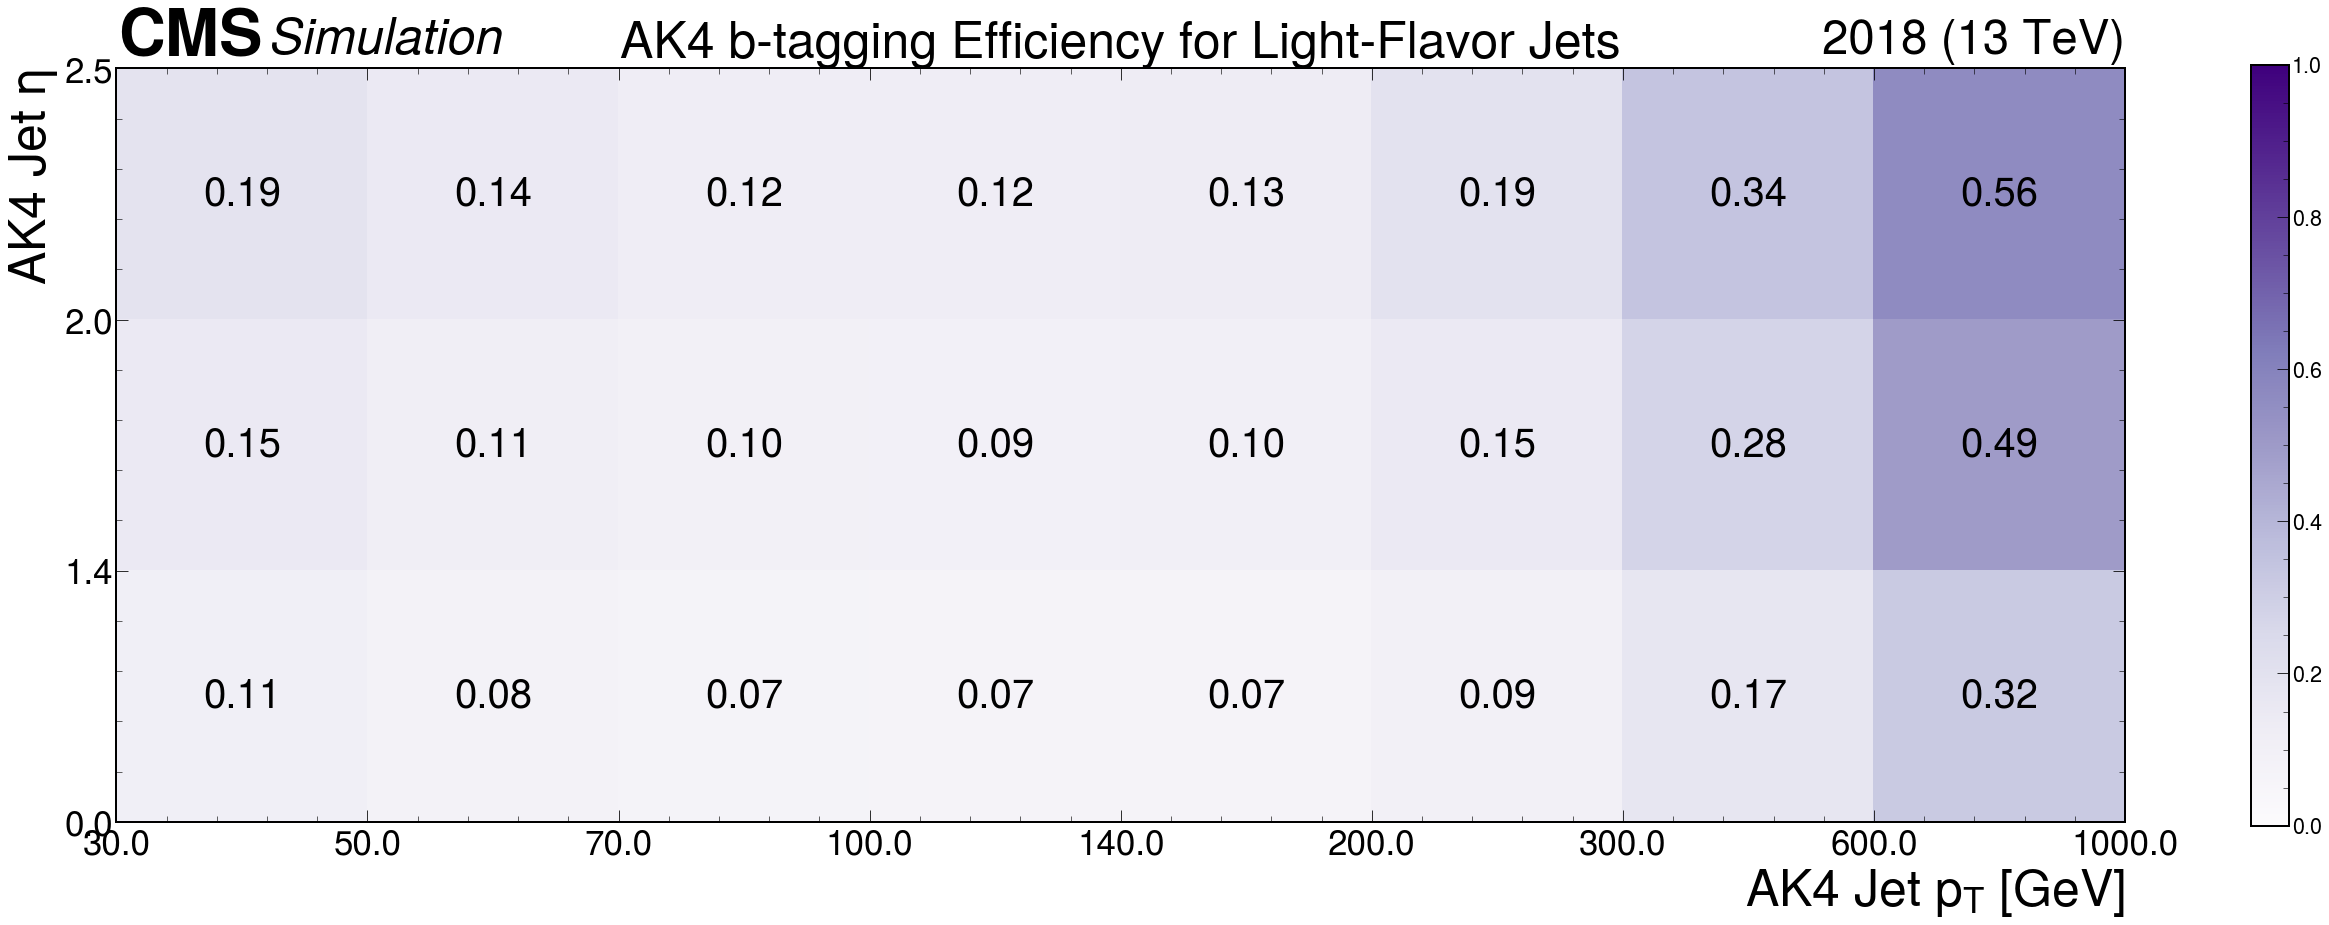

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(figsize=(45,20))

eff=np.swapaxes(np.array(unumpy.nominal_values(lf[1:,:])),0,1)
eff=np.flip(eff, axis=0)
#eff=np.array(unumpy.nominal_values(lf[1:,:])).T
im = ax.imshow(eff,cmap='Purples',vmin=0, vmax=1)
print(eff.shape[0])
for i in range(eff.shape[0]):
    for j in range(eff.shape[1]):
        text = ax.text(j, i, "{:.2f}".format(eff[i, j]),
                       ha="center", va="center", color="k",fontsize=40)
ax.set_xticks(np.arange(-0.5,8.5,1.))
ax.set_xticklabels(btag.axes["pt"].edges[1:],fontsize=35)
ax.set_yticks(np.arange(-0.5,3.5,1.))
ax.set_yticklabels(np.flip(btag.axes["abseta"].edges),fontsize=35)
ax.set_xlabel('AK4 Jet $p_T$ [GeV]', fontsize=50)
ax.set_ylabel('AK4 Jet $\eta$', fontsize=50)
hep.cms.text(ax=ax, loc=0, text='Simulation',fontsize=50)
hep.cms.lumitext(ax=ax, text=year+" (13 TeV)",fontsize=50)
#plt.xlim(20, 1000)
#plt.ylim(0, 2.5)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.7)
ax.set_title("AK4 b-tagging Efficiency for Light-Flavor Jets",fontsize=50)
plt.show()

os.system('mkdir -p ../plots/btageff/results/'+year+'/')
plot_path = os.path.abspath('../plots/btageff/results/'+year+'/')
plot_name = year+'_eff_lf.png'
fig.savefig(os.path.join(plot_path, plot_name))

3


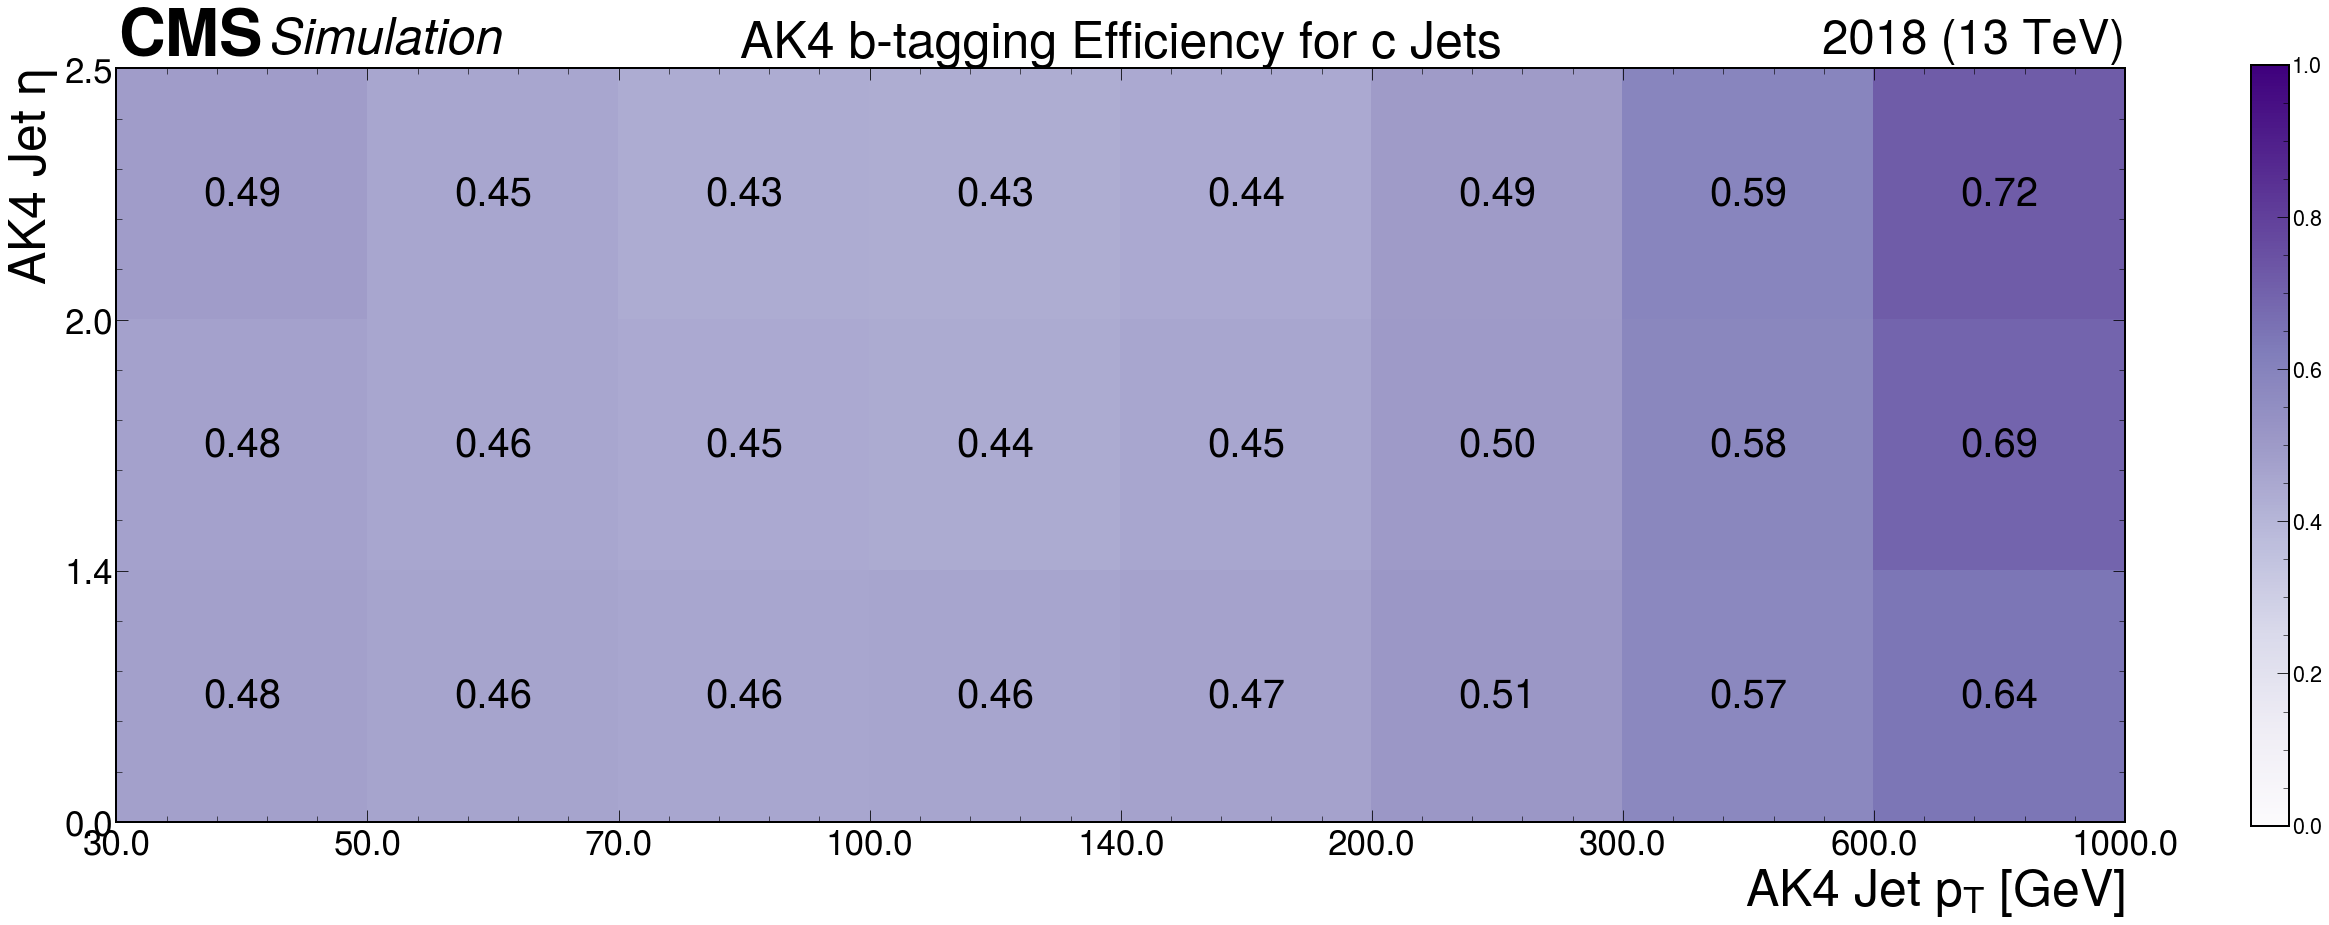

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(figsize=(45,20))

eff=np.swapaxes(np.array(unumpy.nominal_values(cs[1:,:])),0,1)
eff=np.flip(eff, axis=0)
#eff=np.array(unumpy.nominal_values(lf[1:,:])).T
im = ax.imshow(eff,cmap='Purples',vmin=0, vmax=1)
print(eff.shape[0])
for i in range(eff.shape[0]):
    for j in range(eff.shape[1]):
        text = ax.text(j, i, "{:.2f}".format(eff[i, j]),
                       ha="center", va="center", color="k",fontsize=40)
ax.set_xticks(np.arange(-0.5,8.5,1.))
ax.set_xticklabels(btag.axes["pt"].edges[1:],fontsize=35)
ax.set_yticks(np.arange(-0.5,3.5,1.))
ax.set_yticklabels(np.flip(btag.axes["abseta"].edges),fontsize=35)
ax.set_xlabel('AK4 Jet $p_T$ [GeV]', fontsize=50)
ax.set_ylabel('AK4 Jet $\eta$', fontsize=50)
hep.cms.text(ax=ax, loc=0, text='Simulation',fontsize=50)
hep.cms.lumitext(ax=ax, text=year+" (13 TeV)",fontsize=50)
#plt.xlim(20, 1000)
#plt.ylim(0, 2.5)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.7)
ax.set_title("AK4 b-tagging Efficiency for c Jets",fontsize=50)
plt.show()

os.system('mkdir -p ../plots/btageff/results/'+year+'/')
plot_path = os.path.abspath('../plots/btageff/results/'+year+'/')
plot_name = year+'_eff_c.png'
fig.savefig(os.path.join(plot_path, plot_name))

3


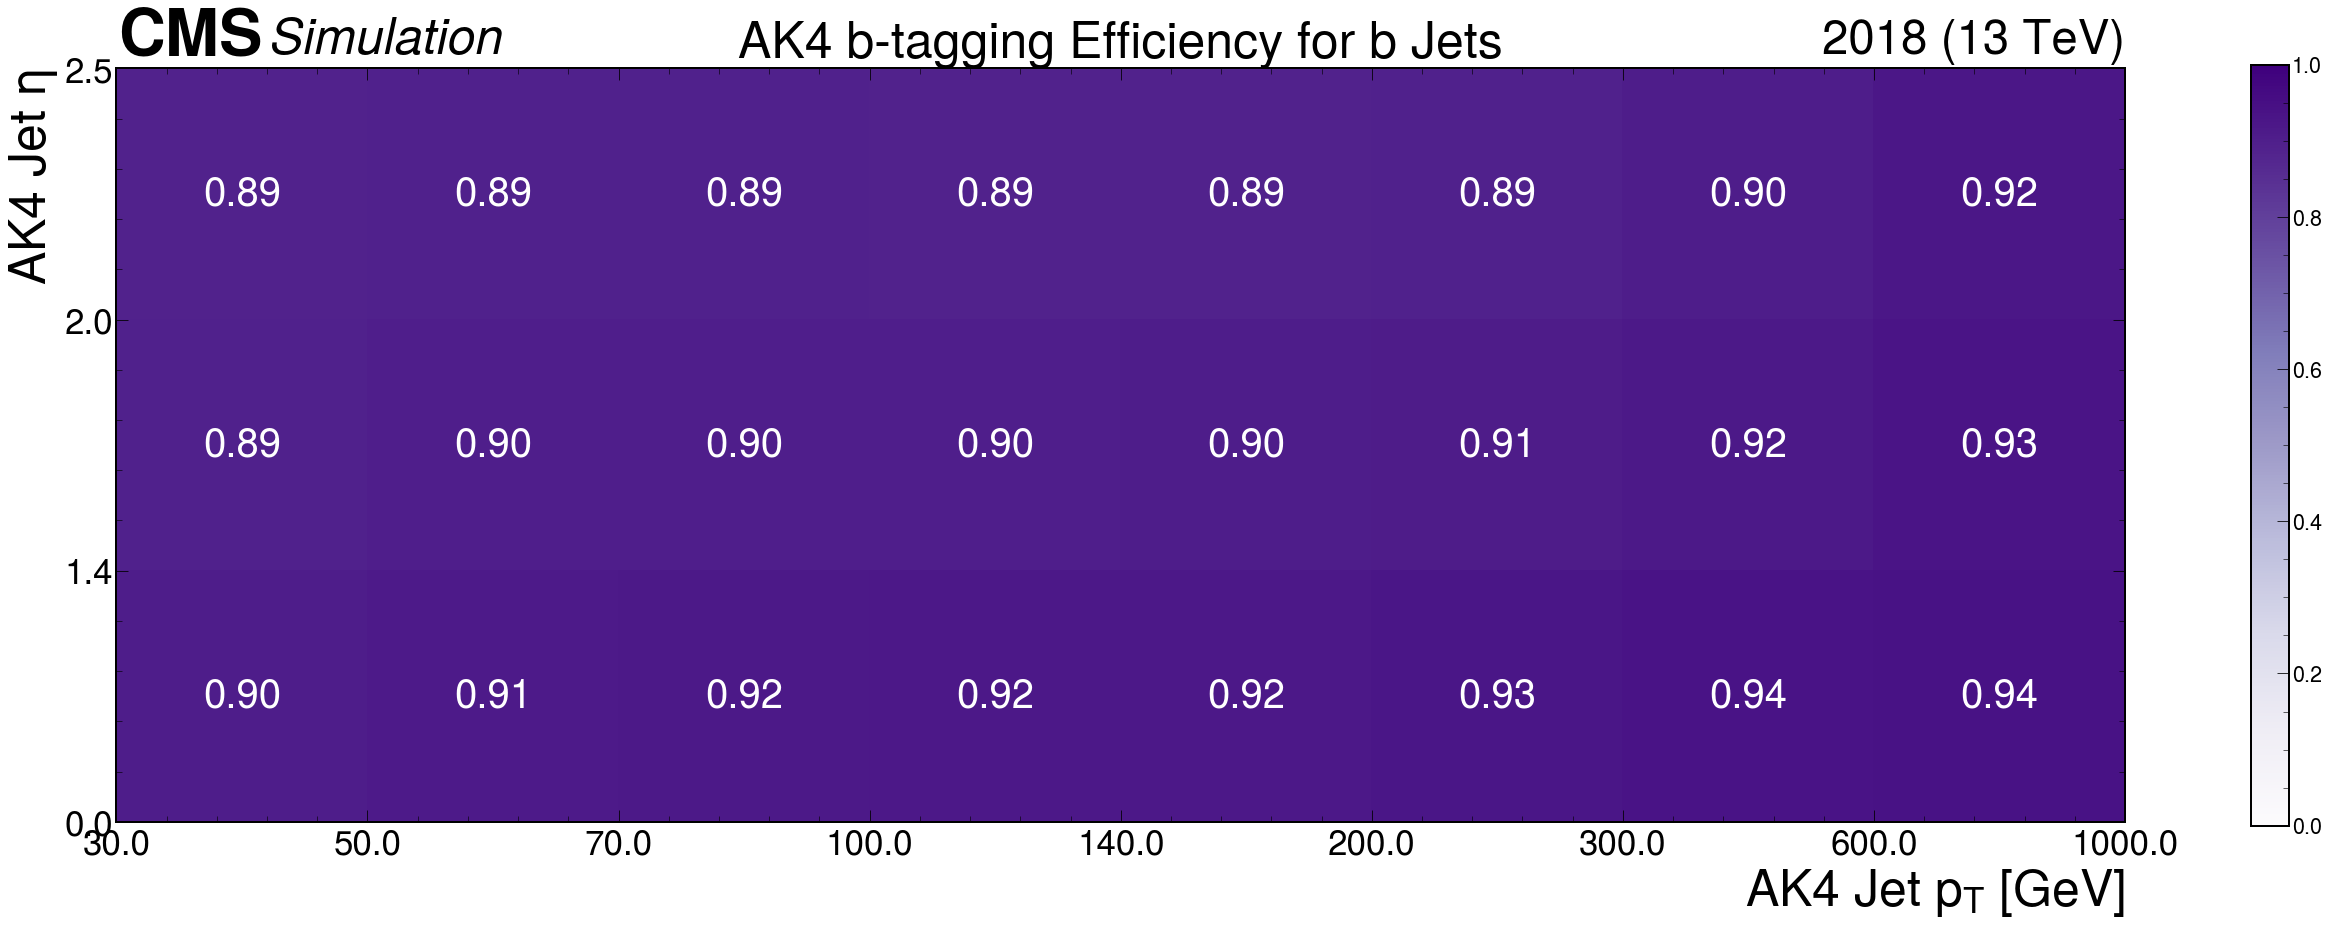

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(figsize=(45,20))

eff=np.swapaxes(np.array(unumpy.nominal_values(bs[1:,:])),0,1)
eff=np.flip(eff, axis=0)
#eff=np.array(unumpy.nominal_values(lf[1:,:])).T
im = ax.imshow(eff,cmap='Purples',vmin=0, vmax=1)
print(eff.shape[0])
for i in range(eff.shape[0]):
    for j in range(eff.shape[1]):
        text = ax.text(j, i, "{:.2f}".format(eff[i, j]),
                       ha="center", va="center", color="w",fontsize=40)
ax.set_xticks(np.arange(-0.5,8.5,1.))
ax.set_xticklabels(btag.axes["pt"].edges[1:],fontsize=35)
ax.set_yticks(np.arange(-0.5,3.5,1.))
ax.set_yticklabels(np.flip(btag.axes["abseta"].edges),fontsize=35)
ax.set_xlabel('AK4 Jet $p_T$ [GeV]', fontsize=50)
ax.set_ylabel('AK4 Jet $\eta$', fontsize=50)
hep.cms.text(ax=ax, loc=0, text='Simulation',fontsize=50)
hep.cms.lumitext(ax=ax, text=year+" (13 TeV)",fontsize=50)
#plt.xlim(20, 1000)
#plt.ylim(0, 2.5)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.7)
ax.set_title("AK4 b-tagging Efficiency for b Jets",fontsize=50)
plt.show()

os.system('mkdir -p ../plots/btageff/results/'+year+'/')
plot_path = os.path.abspath('../plots/btageff/results/'+year+'/')
plot_name = year+'_eff_b.png'
fig.savefig(os.path.join(plot_path, plot_name))